In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

from pathlib import Path

# Conversion from lab software format to csv

In [7]:
def dpt_csv_conversion():
    """
    Software from lab outputs in a dpt format, 
    so some cleanup to process is necessary"""
    for i in os.listdir('reflection_spectra/'):
        if i.endswith(".DS_Store"):
            continue
        else:
            p = Path('reflection_spectra/' + i)
            p.rename(p.with_suffix('.csv'))

    for i in os.listdir('reflection_spectra/'):
        if i.endswith(".DS_Store"):
            continue
        else:
            dataframe = pd.read_csv("reflection_spectra/" + i, header=None, delimiter = '\t')
            dataframe.rename(columns={0: 'Frequency', 1: 'Reflectivity'}, inplace=True)
            dataframe.to_csv("reflection_spectra/" + i, index=False)

In [32]:
def read_spectra(identifier):
    
    relevant_paths = [i for i in os.listdir("reflection_spectra/") if identifier in i]
    relevant_paths = sorted(relevant_paths, key=lambda x:float(re.findall("(\d+)",x)[0]))
    spectra = [pd.read_csv("reflection_spectra/" + path) for path in relevant_paths]

    return spectra


def plot_preparation(spectra):

    angles = np.linspace(0,360, len(spectra))
    frequency = spectra[0]['Frequency'].to_numpy()
    x, y = np.meshgrid(angles, frequency)

    reflectivities = np.asarray([spectrum['Reflectivity'].to_numpy() for spectrum in spectra]).T

    return x, y, reflectivities


def heatmap(x, y, reflectivities, title):
    params = {'mathtext.default': 'regular' }          
    plt.rcParams.update(params)
    plt.figure()
    plt.pcolormesh(x, y, reflectivities, cmap = 'magma')
    cbar = plt.colorbar()
    cbar.set_label("Reflectivity")
    plt.title(title)
    plt.xlabel('Angles /Degrees')
    plt.ylabel('$\omega/2\pi c (cm^{-1})$')
    plt.show()


def main(identifier, title):
    heatmap(*plot_preparation(read_spectra(identifier)),title)

# Functionality

## Large Front P, No Second Polariser

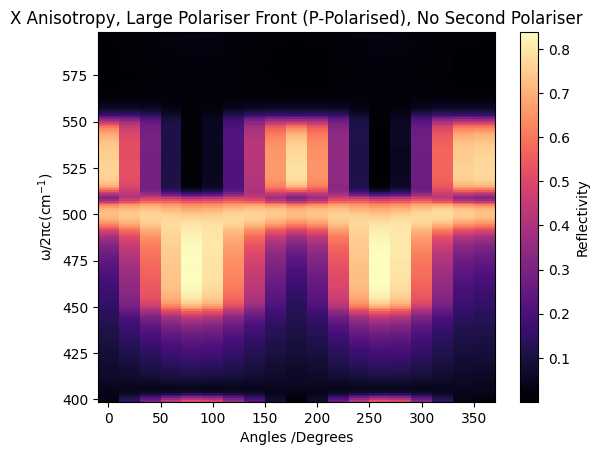

In [33]:
file_description = "Mark_Quartz_XAnisotropy_LargePolariserFront_ppolarised"
title = "X Anisotropy, Large Polariser Front (P-Polarised), No Second Polariser"
main(file_description,title)

## Small Front P, No Second Polariser

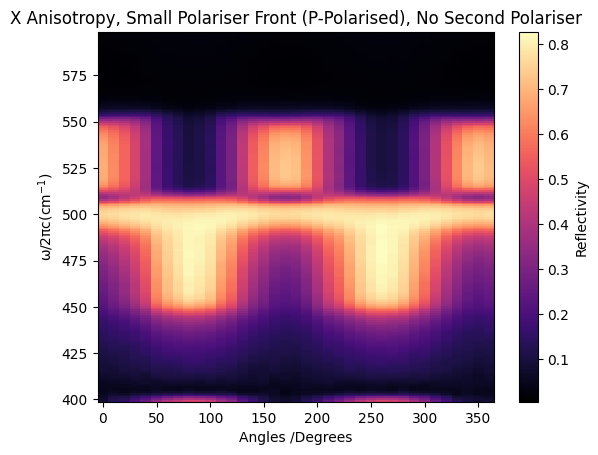

In [34]:
file_description = "Mark_Quartz_XAnisotropy_SmallPolariserFront_Azimuthal."
title = "X Anisotropy, Small Polariser Front (P-Polarised), No Second Polariser"
main(file_description,title)

## Small Front S, No Second Polariser

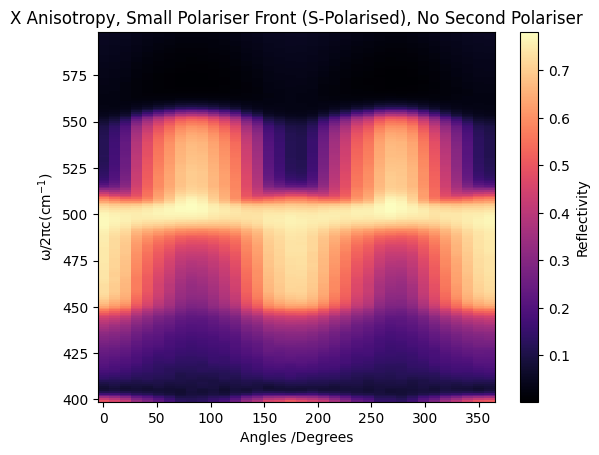

In [35]:
file_description = "Mark_Quartz_XAnisotropy_SmallPolariserFront_Azimuthal_spolarised"
title = "X Anisotropy, Small Polariser Front (S-Polarised), No Second Polariser"
main(file_description,title)

## Large Front S, No Second Polariser

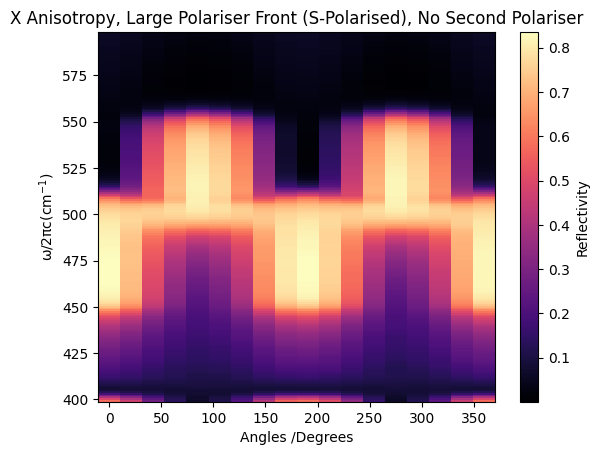

In [36]:
file_description = "Mark_Quartz_XAnisotropy_LargePolariserFront_spolarised"
title = "X Anisotropy, Large Polariser Front (S-Polarised), No Second Polariser"
main(file_description,title)

## Large Front S, Small Back S

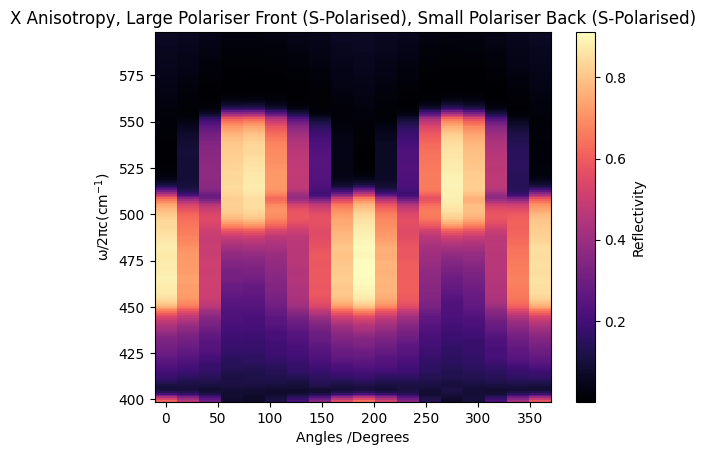

In [37]:
file_description = "Mark_Quartz_XAnisotropy_LargeFront_spolarised_SmallBack_spolarised"
title = "X Anisotropy, Large Polariser Front (S-Polarised), Small Polariser Back (S-Polarised)"
main(file_description,title)

## Large Front P, Small Back P

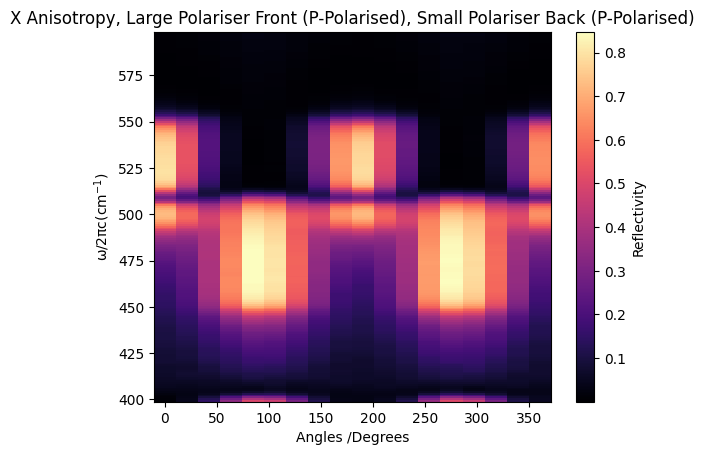

In [38]:
file_description = "Mark_Quartz_XAnisotropy_LargeFront_ppolarised_SmallBack_ppolarised"
title = "X Anisotropy, Large Polariser Front (P-Polarised), Small Polariser Back (P-Polarised)"
main(file_description,title)

## Large Front P, Small Back S

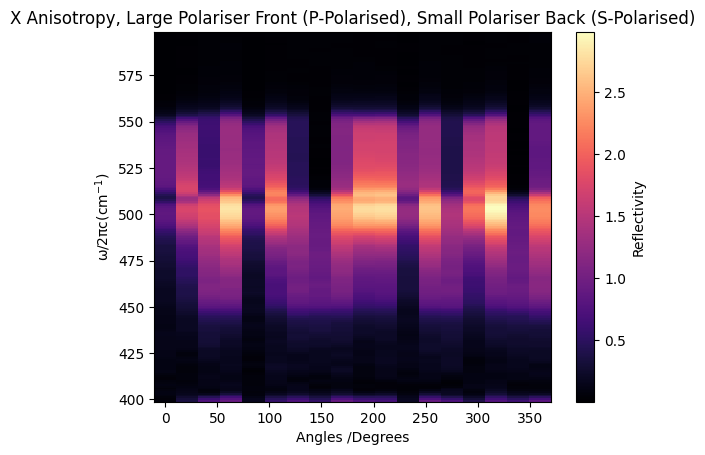

In [39]:
file_description = "Mark_Quartz_XAnisotropy_LargeFront_ppolarised_SmallBack_spolarised_attempt"
title = "X Anisotropy, Large Polariser Front (P-Polarised), Small Polariser Back (S-Polarised)"
main(file_description,title)

## Large Front S, Small Back P

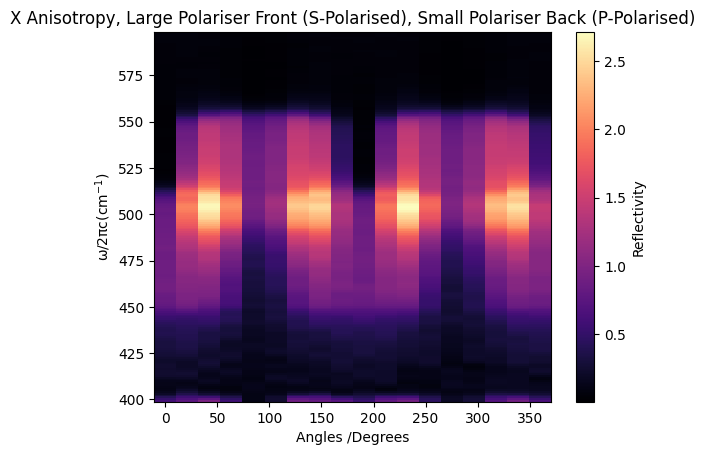

In [40]:
file_description = "Mark_Quartz_XAnisotropy_LargeFront_spolarised_SmallBack_ppolarised"
title = "X Anisotropy, Large Polariser Front (S-Polarised), Small Polariser Back (P-Polarised)"
main(file_description,title)